# ANN & MNIST : exercise

## 라이브러리 불러오기

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [18]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

In [19]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [116]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 0
다음 그림은 숫자 5 입니다.


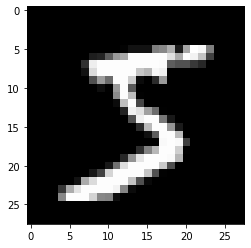

In [117]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [118]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [119]:
train_x = train_x.reshape([train_x.shape[0], -1])
test_x = test_x.reshape([test_x.shape[0], -1])

In [120]:
train_x.shape, test_x.shape

((60000, 784), (10000, 784))

* min-max scaling

In [ ]:
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n

In [ ]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [123]:
train_x.max(), train_x.min()

(1.0, 0.0)

In [124]:
test_x.max(), test_x.min()

(1.0, 0.0)

* target feature : One-hot Encoding

In [125]:
from tensorflow.keras.utils import to_categorical

In [12]:
n = len(set(train_y))
n

10

In [127]:
train_y = to_categorical(train_y, n)
test_y = to_categorical(test_y, n)

In [128]:
train_y.shape, test_y.shape

((60000, 10), (10000, 10))

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [38]:
########################
# 모델링 I : .fit( ) 까지!
########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add( keras.layers.Input(shape=(train_x.shape[1])))
model.add( keras.layers.Dense(train_y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


4. Early Stopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
es = EarlyStopping(monitor='val_loss', # 관측 대상 / val_loss : validation_split 의 val_x 로 loss 계산, default
                                       #           / val      : trains_x 으로 loss 계산
                   min_delta=0,        # 최소한 나빠지지 않으면 괜찮아
                   patience=5,         # 성능 개선되지 않는걸 얼마나 참을래? 5번
                   verbose=1,
                   restore_best_weights=True)   # 학습이 멈췄을 때, 최적의 가중치로 돌아감

In [41]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [42]:
model.fit(train_x, train_y, 
          validation_split=0.2, # train data의 20%를 validation으로 사용함 // monitor='val_loss' 할때 사용
          callbacks=[es],       # Early Stopping 적용
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5136 - accuracy: 0.8669 - val_loss: 0.3185 - val_accuracy: 0.9111
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3181 - accuracy: 0.9112 - val_loss: 0.2877 - val_accuracy: 0.9197
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9173 - val_loss: 0.2771 - val_accuracy: 0.9219
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.9214 - val_loss: 0.2686 - val_accuracy: 0.9258
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2737 - accuracy: 0.9235 - val_loss: 0.2639 - val_accuracy: 0.9279
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2676 - accuracy: 0.9253 - val_loss: 0.2637 - val_accuracy: 0.9300
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2642 - accuracy: 0.9261 - val_loss: 0.2638 - val_accuracy:

In [43]:
model.fit(train_x,
          train_y,
          epochs=50,
          verbose=1,
          callbacks=[es],
          validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2486 - accuracy: 0.9310 - val_loss: 0.2618 - val_accuracy: 0.9284
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2467 - accuracy: 0.9309 - val_loss: 0.2683 - val_accuracy: 0.9263
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2450 - accuracy: 0.9317 - val_loss: 0.2610 - val_accuracy: 0.9297
Epoch 4/50
1276/1500 [========================>.....] - ETA: 0s - loss: 0.2444 - accuracy: 0.9310

KeyboardInterrupt: ignored

In [44]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 93.28%
테스트 정확도 : 92.77%


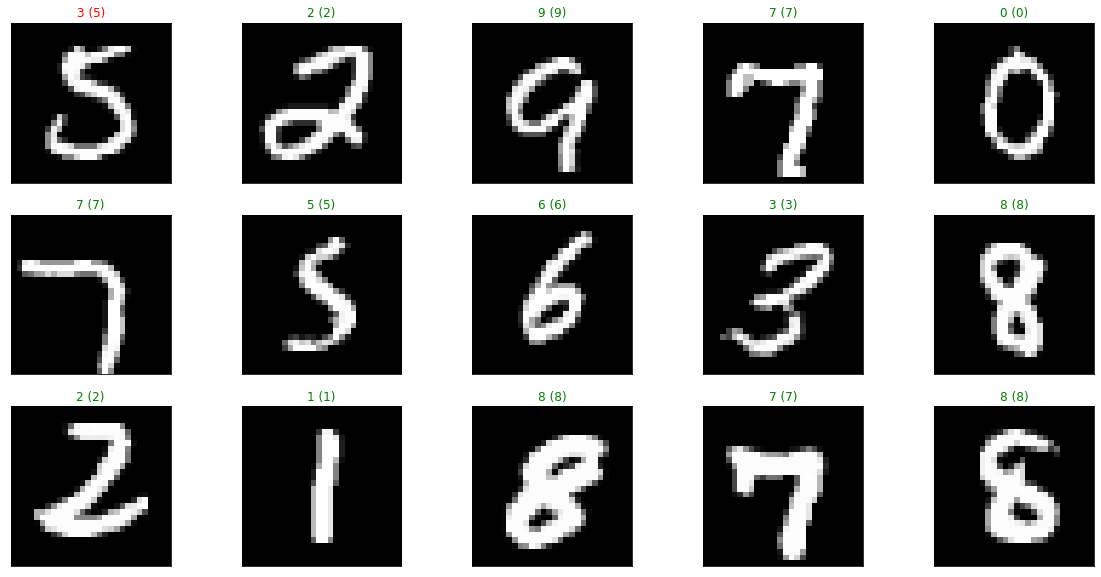

In [45]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 1525
다음 그림은 숫자 5 입니다.
모델의 예측 : 0
모델의 카테고리별 확률 : [58.  0.  3.  6.  0. 13.  0.  0. 18.  0.]
틀렸어요


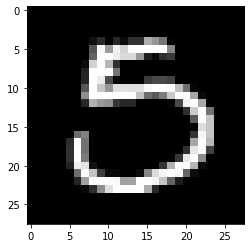

In [46]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)

2 차원 그대로 사용 + one-hot 인코딩 사용 x

In [4]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy

from tensorflow.keras.callbacks import EarlyStopping

Sequential()

In [28]:
clear_session()

model = Sequential()

model.add( Input(shape=(train_x.shape[1], train_x.shape[2])))
model.add( Flatten() )
model.add( Dense(n, activation='softmax'))

model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [14]:
clear_session()

il = Input(shape=(train_x.shape[1], train_x.shape[2]))
fl = Flatten()(il)
ol = Dense(n, activation='softmax')(fl)

model = Model(il, ol)

model.compile(optimizer=keras.optimizers.Adam(), loss=sparse_categorical_crossentropy, metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [29]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [25]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [30]:
model.fit(train_x, train_y, 
          validation_split=0.2, # train data의 20%를 validation으로 사용함 // monitor='val_loss' 할때 사용
          callbacks=[es],       # Early Stopping 적용
          verbose=1, epochs=50)

Epoch 1/50


ValueError: ignored

In [106]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y, single_pred_train)
logi_test_accuracy = accuracy_score(test_y, single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 90.35%
테스트 정확도 : 90.11%


In [112]:
test_x.shape

(10000, 28, 28)

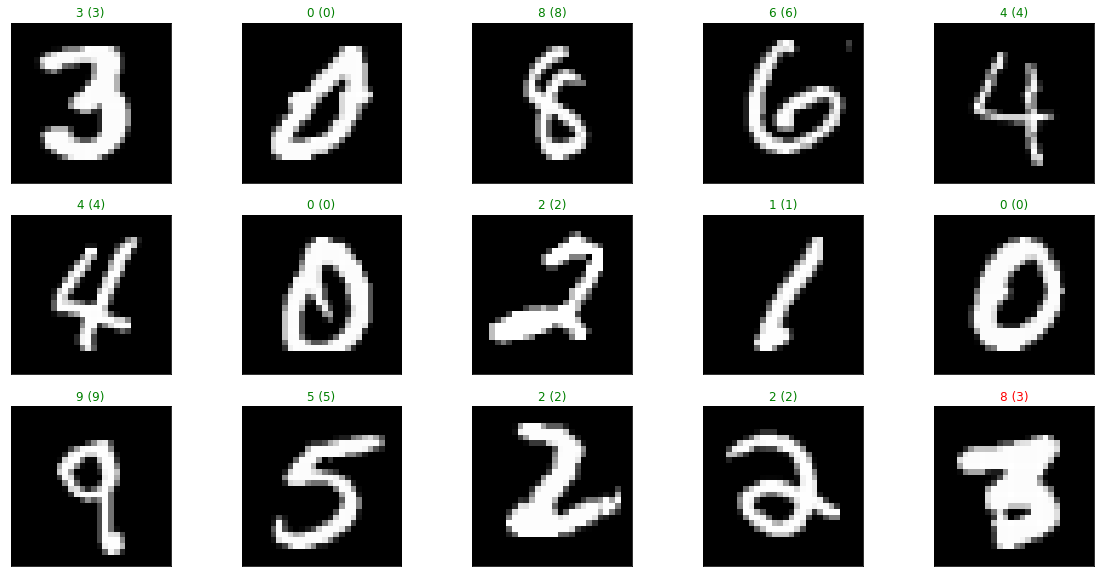

In [113]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index]
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9740
다음 그림은 숫자 [7 2 1 ... 4 5 6] 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]
틀렸어요


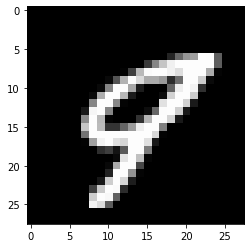

In [111]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [135]:
#########################
# 모델링 II : .fit( ) 까지!
#########################
keras.backend.clear_session()

model = keras.models.Sequential()

model.add( keras.layers.Input(shape=(train_x.shape[1])))
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(512, activation='relu'))
model.add( keras.layers.Dense(train_y.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [136]:
model.fit(train_x, train_y, 
          validation_split=0.2, # train data의 20%를 validation으로 사용함 // monitor='val_loss' 할때 사용
          callbacks=[es],       # Early Stopping 적용
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2179 - accuracy: 0.9357 - val_loss: 0.1149 - val_accuracy: 0.9657
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0983 - accuracy: 0.9702 - val_loss: 0.1037 - val_accuracy: 0.9682
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0708 - accuracy: 0.9782 - val_loss: 0.0811 - val_accuracy: 0.9776
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9821 - val_loss: 0.1325 - val_accuracy: 0.9647
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0437 - accuracy: 0.9863 - val_loss: 0.1342 - val_accuracy: 0.9660
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0385 - accuracy: 0.9884 - val_loss: 0.0958 - val_accuracy: 0.9780
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0344 - accuracy: 0.9900 - val_loss: 0.1084 - val_accuracy:

In [137]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.74%
테스트 정확도 : 97.71%


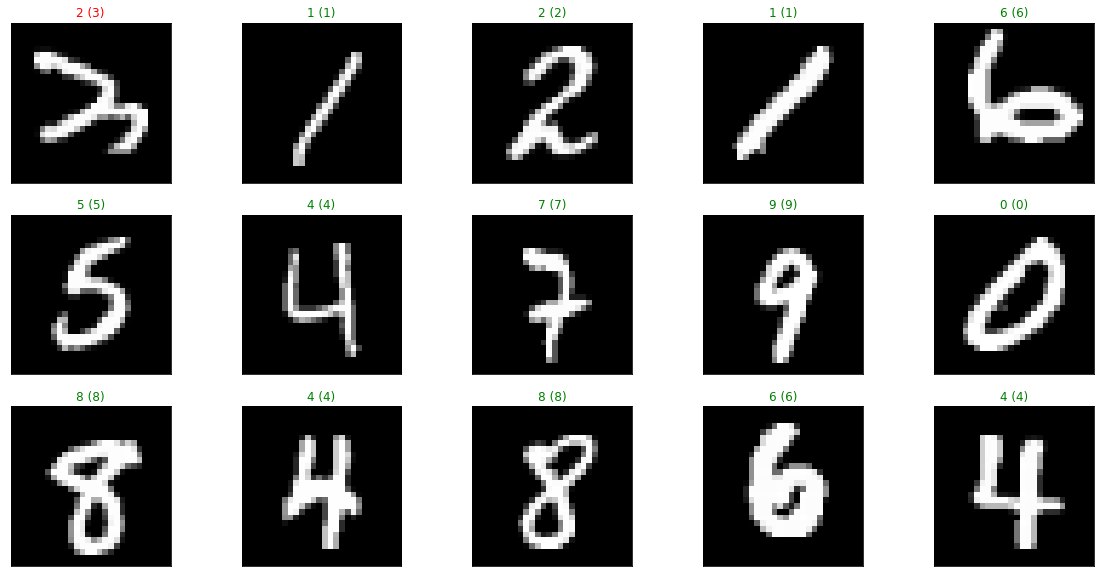

In [132]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 7886
다음 그림은 숫자 2 입니다.
모델의 예측 : 9
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 47.  0.  0.  0.  0. 52.]
틀렸어요


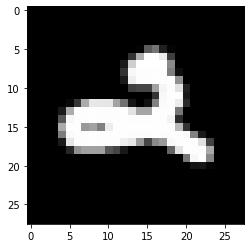

In [133]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [99]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 2.6180 - accuracy: 0.0839


[2.6180484294891357, 0.08389999717473984]